<a href="https://colab.research.google.com/github/sunny722122/capitalstone_Proj_malaria_detection/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------------
# **Malaria Detection**
---------------------------------------------------------------------------------------

-------------------
## **Context**
-------------------

Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans through the bites of infected female Anopheles mosquitoes. The parasites enter the blood and begin damaging red blood cells (RBCs) that carry oxygen, which can result in respiratory distress and other complications. The lethal parasites can stay alive for more than a year in a person’s body without showing any symptoms. Therefore, late treatment can cause complications and could even be fatal. Almost 50% of the world’s population is in danger from malaria. There were more than 229 million malaria cases and 400,000 malaria-related deaths reported over the world in 2019. Children under 5 years of age are the most vulnerable population group affected by malaria; in 2019 they accounted for 67% of all malaria deaths worldwide.
Traditional diagnosis of malaria in the laboratory requires careful inspection by an experienced professional to discriminate between healthy and infected red blood cells. It is a tedious, time-consuming process, and the diagnostic accuracy (which heavily depends on human expertise) can be adversely impacted by inter-observer variability.
An automated system can help with the early and accurate detection of malaria. Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have consistently shown higher accuracy than manual classification. It would therefore be highly beneficial to propose a method that performs malaria detection using Deep Learning Algorithms.

---------------------
## **Objective**
---------------------

Build an efficient computer vision model to detect malaria. The model should identify whether the image of a red blood cell is that of one infected with malaria or not, and classify the same as parasitized or uninfected, respectively.

---------------------
## **Key questions**
---------------------

*   How to improve the diagnosis speed to get patient early treatment?
*   How to get the dianose result more reliable and accurate?

---------------------
## **Problem Formulation**
---------------------

Need to use automation method to get the diagnosis faster and improve the accuracy

-------------------
## **Dataset**
-------------------

The dataset are colored images of red blood cells that contain parasitized and uninfected instances, where:
● The parasitized cells contain the Plasmodium parasite
● The uninfected cells are free of the Plasmodium parasites but could contain other impurities

Mount the drive
Mounting the Google drive.

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary libraries

In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

check the version of tensorflow.

In [5]:
print(tf.__version__)

2.8.2


## **Load the dataset**

- Let us now load the dataset that is available as a .zip file.
- Split the data into the train and the test dataset.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image

# Importing Deep Learning Libraries

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import imghdr
file_name='/content/drive/MyDrive/cell_images.zip'
with zipfile.ZipFile(file_name, 'r') as zip_ref:
  zip_ref.extractall()

In [94]:
picture_size = 48
channels=3
folder_path = "cell_images/"

## **Visualizing Malaria showing parasitized**

First, Visualizing Malaria images that exhibit the parasitized.

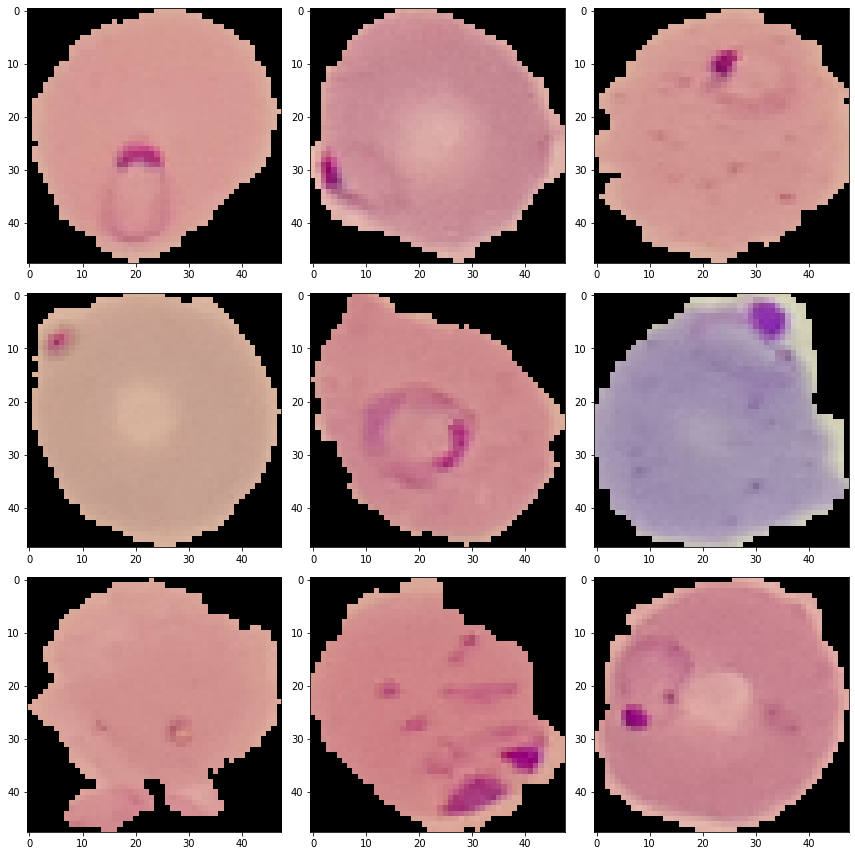

In [95]:
malaria_presence = 'parasitized'

# The following code plots the first nine images in the folder 'yes'.
plt.figure(figsize = (12, 12)) 

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path +'train/' + malaria_presence + "/" +
                  os.listdir(folder_path + 'train/' + malaria_presence)[i],target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

## **Visualizing Malaria images without infections**

Then let's see what the cell images that healthy look like.

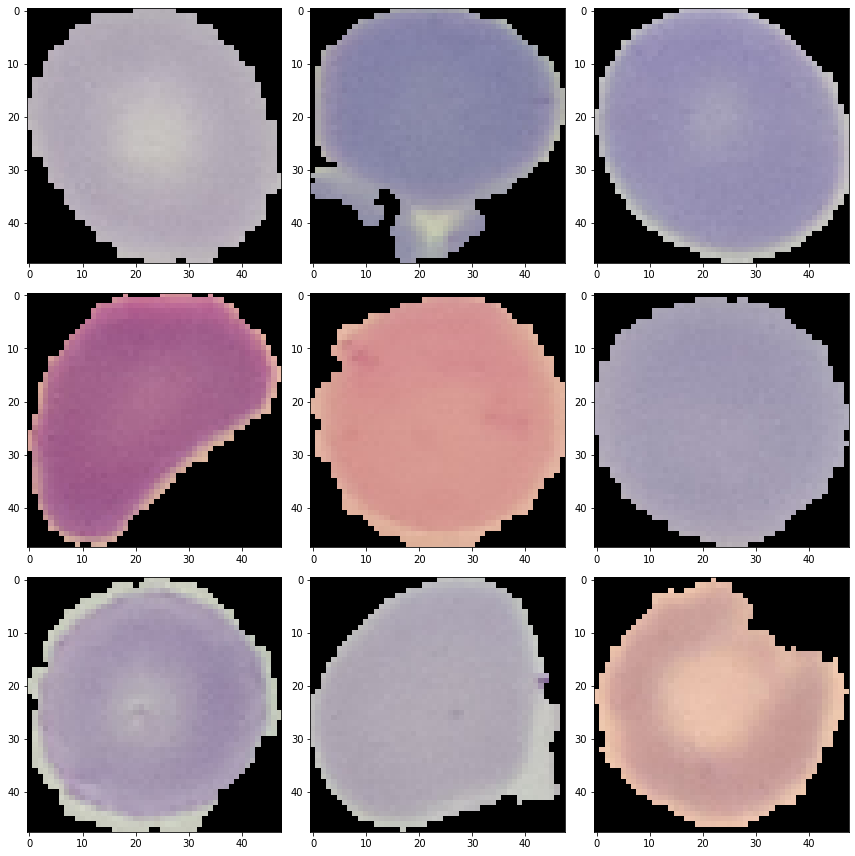

In [96]:
malaria_presence = 'uninfected'

# The following code plots the first nine images in the folder 'no'.
plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + 'train/' + malaria_presence + "/" +
                  os.listdir(folder_path + 'train/' + malaria_presence)[i],target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations:**

- The cell images that have parasitized have patches (purple or blue) of varying sizes and they are present at different locations within the cross-sectional view of the cell.
- The cell images of healthy show no such patches.

In [7]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [8]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [9]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [10]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [101]:
print(train_images.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [102]:
print(train_labels.shape)
print(test_labels.shape)

(24958,)
(2600,)


####<b> Observations and insights:
The training images include 24958 images with 3 channels (RGB) same as training labels
<br>
There are 2600 test images, with 3 channels as well, same as test labels

### <b>Check the minimum and maximum range of pixel values for train and test images

In [103]:
min_train=np.min(np.min(np.min(train_images,axis=1),axis=0),axis=0)
max_train=np.max(np.max(np.amax(train_images,axis=1),axis=0),axis=0)
print(f"train pixel values rang max:{max_train}, min:{min_train}")
min_test=np.min(np.min(np.min(test_images,axis=1),axis=0),axis=0)
max_test=np.max(np.max(np.amax(test_images,axis=1),axis=0),axis=0)
print(f"test pixel values rang max:{max_test}, min:{min_test}")

train pixel values rang max:[255 245 240], min:[0 0 0]
test pixel values rang max:[255 236 218], min:[0 0 0]


####<b> Observations and insights: 
The image pixels show similar range from dark to white, while test images show lighter from pixel values


###<b> Count the number of values in both uninfected and parasitized 

In [104]:
arruniq_train,arr_count_train=np.unique(train_labels, return_counts=True)
print(arruniq_train)
print(arr_count_train)
print(f"For train images, uninfected percentage: {arr_count_train[0]/arr_count_train.sum()}\n parasitized percentage:{arr_count_train[1]/arr_count_train.sum()}")

[0 1]
[12376 12582]
For train images, uninfected percentage: 0.4958730667521436
 parasitized percentage:0.5041269332478564


In [105]:
arruniq_test,arr_count_test=np.unique(test_labels, return_counts=True)
print(arruniq_test)
print(arr_count_test)
print(f"For test images, uninfected percentage: {arr_count_test[0]/arr_count_test.sum()}\n parasitized percentage:{arr_count_test[1]/arr_count_test.sum()}")

[0 1]
[1300 1300]
For test images, uninfected percentage: 0.5
 parasitized percentage:0.5


###<b>Normalize the images

In [11]:
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

####<b> Observations and insights: 
There are 12376 images that is uninfected, 12582 images that is parasitized,percentage is uninfected 0.495, parasitized 0.5
<br>
For test images, there are 1300 uninfected, same as parasitized.
The data is quite balanced for both train and test.

###<b> Plot to check if the data is balanced

In [107]:
train_labels

array([1, 1, 1, ..., 0, 0, 0])

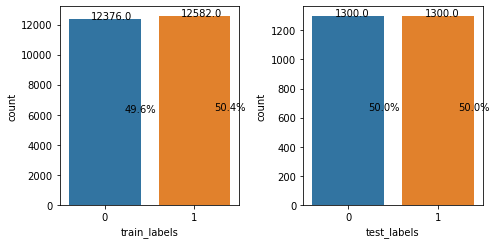

In [108]:
fig, ax =plt.subplots(1,2)
df_train = pd.DataFrame(dict(train_labels=train_labels))

ax1 = sns.countplot(x="train_labels", data=df_train,ax=ax[0])
total = float(len(df_train))
for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
   percentage = '{:.1f}%'.format(100 * p.get_height()/total)
   x = p.get_x() + p.get_width()
   y = 0.5*p.get_height()
   ax1.annotate(percentage, (x, y),ha='center')
df_test = pd.DataFrame(dict(test_labels=test_labels))

ax2 = sns.countplot(x="test_labels", data=df_test,ax=ax[1])
total = float(len(df_test))
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
   percentage = '{:.1f}%'.format(100 * p.get_height()/total)
   x = p.get_x() + p.get_width()
   y = 0.5*p.get_height()
   ax2.annotate(percentage, (x, y),ha='center')

####<b> Observations and insights: 
There are 12376 images that is uninfected, 12582 images that is parasitized,percentage is uninfected 0.495, parasitized 0.5
<br>
For test images, there are 1300 uninfected, same as parasitized.
The data is quite balanced for both train and test.

### <b>Data Exploration</b>
Let's visualize the images from the train data

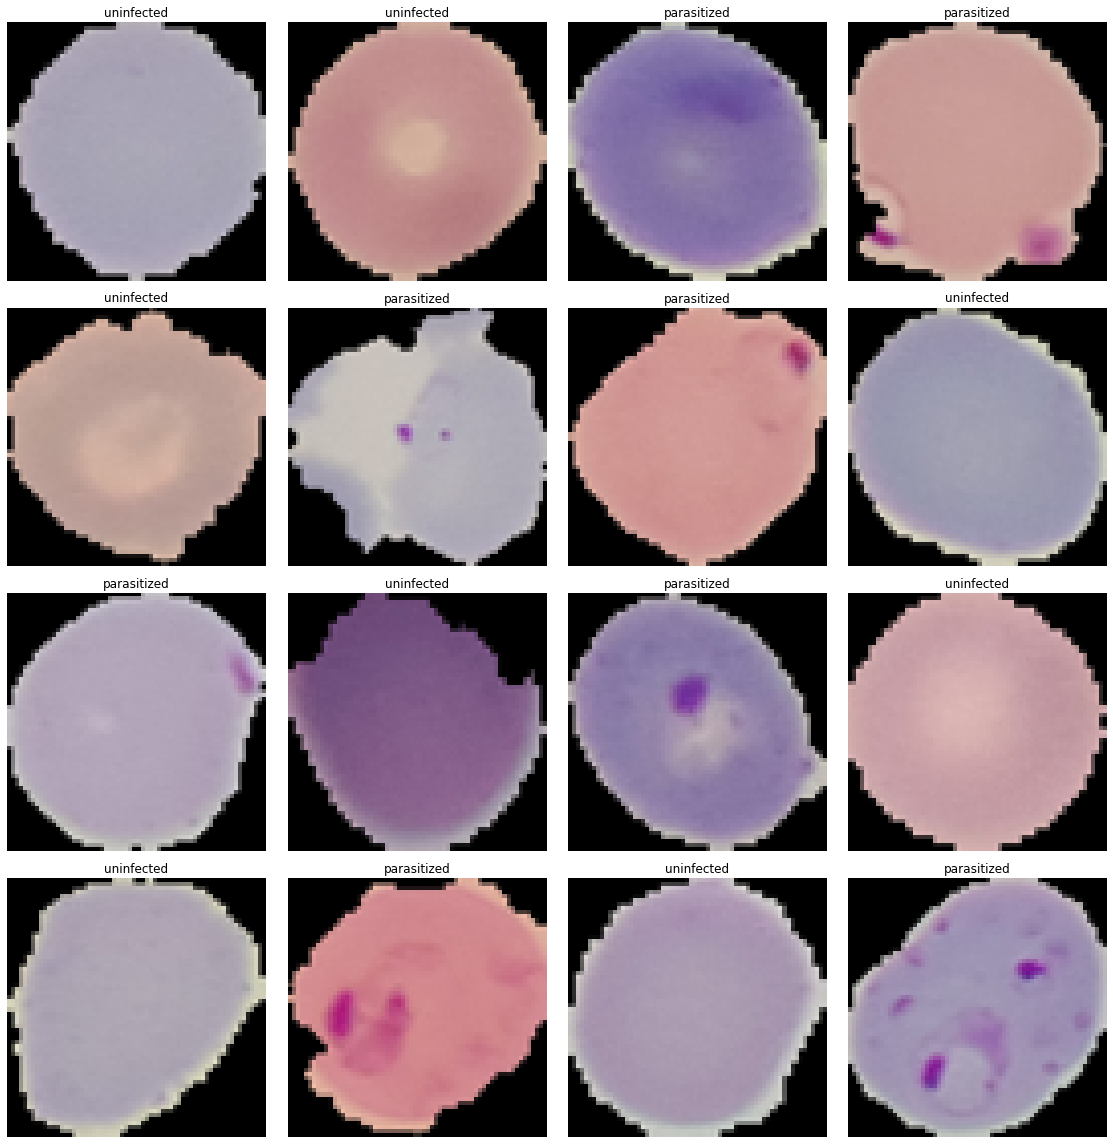

In [109]:
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b>Observations and insights:
From the images, the uninfected cells image is clear, while the parasitized cells image have purple patches in different location, different size, and different amount

###<b> Plotting the mean images for parasitized and uninfected

In [12]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

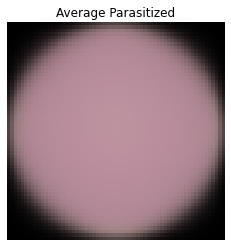

In [13]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

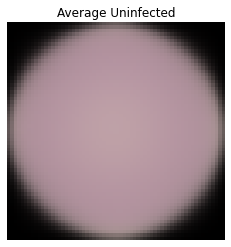

In [14]:
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean

####<b> Observations and insights: 
From the mean image plotting, the Parasitized mean image show more darker in color than the uninfected mean image

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [15]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


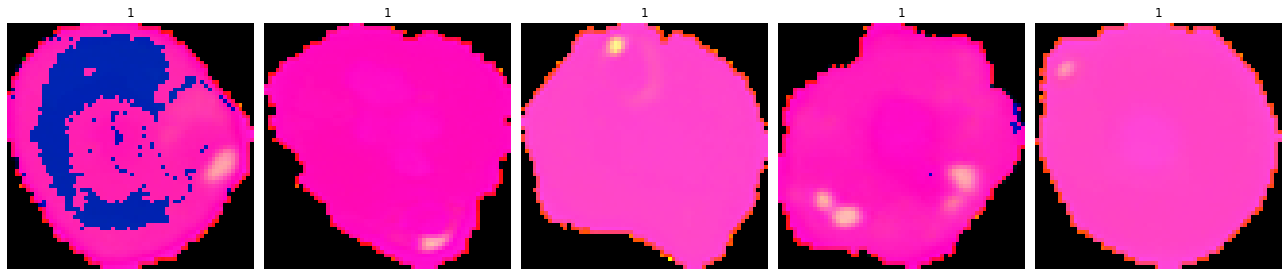

In [16]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [17]:
gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx_test.append(a)

gfx_test = np.array(gfx_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


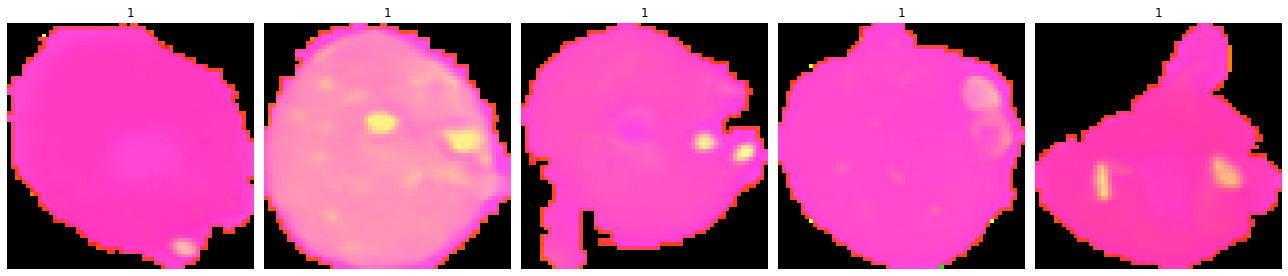

In [18]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_test[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights:
The intensity of images could help to differentiate Parasitized images from uninfect images.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [19]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

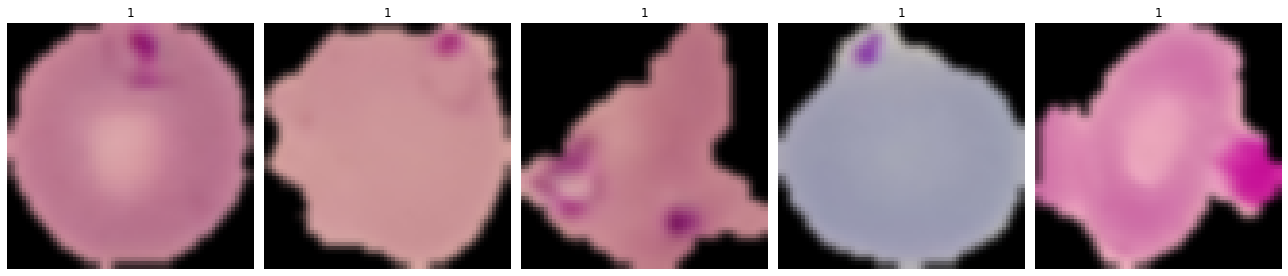

In [20]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [22]:
gbx_test = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx_test.append(b)

gbx_test = np.array(gbx_test)

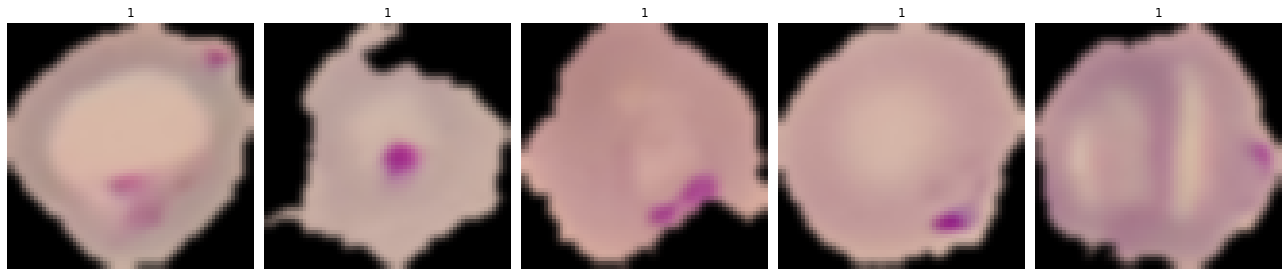

In [23]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx_test[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights:
From the image plotting, the gaussian blurring removed some of the nosises, while make some of the Parasitized part melting with the background, which make it difficult to differentiate parasitized images.

## **Proposed approach**

**Potential techniques:** 
high contrast vertical or horizontal edge filter which will result in a sharper image along edges
Mixing images together by averaging their pixel values is a very counterintuitive approach to Data Augmentation. 
Random erasing is another interesting Data Augmentation technique.
GAN-based Data Augmentation.
**Overall solution design:** will try different combination of the technique<br>
**Measures of success:** Use confusion matrix, and F1 score to assess model<br>

## **Creating Training and Testing Image Data Generators**

Let's create data loaders to pass to the neural network architectures. We will let the train, and test data loaders take the images from their respective folders.

In [10]:
batch_size=128

datagen_train = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
datagen_test = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['parasitized', 'uninfected'],
                                              shuffle = True,
                                              subset='training')
validation_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['parasitized', 'uninfected'],
                                              shuffle = True,
                                              subset='validation')
test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                            target_size = (picture_size, picture_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['parasitized', 'uninfected'],
                                            shuffle = True)

Found 19967 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


check data imbalance?

### **Convolutional Neural Network (CNN)**

Let's create a CNN model and see if we get better accuracy than the ANN model.

In [11]:
model1 = Sequential()

# First Convolutional block
model1.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (picture_size, picture_size, channels)))
model1.add(MaxPooling2D(2, 2))

# Second Convolutional block
model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(2, 2))

# Flattening layer
model1.add(Flatten())

# Fully Connected layer
model1.add(Dense(128, activation = 'relu'))

# Classifier
model1.add(Dense(2, activation = 'sigmoid'))

# Adam optimizer with 0.0001 learning rate
adam = Adam(0.0001)

# Compiling the model
model1.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ['accuracy'])

# Model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
# Fitting the model
history1 = model1.fit(train_set,
                         steps_per_epoch = train_set.n//train_set.batch_size,
                         epochs = 30,
                         validation_data = validation_set
                        )

Epoch 1/30
155/155 [==============================] - 66s 414ms/step - loss: 0.6609 - accuracy: 0.5971 - val_loss: 0.6915 - val_accuracy: 0.5177
Epoch 2/30
155/155 [==============================] - 64s 414ms/step - loss: 0.6228 - accuracy: 0.6581 - val_loss: 0.6193 - val_accuracy: 0.6726
Epoch 3/30
155/155 [==============================] - 64s 412ms/step - loss: 0.6060 - accuracy: 0.6752 - val_loss: 0.6516 - val_accuracy: 0.5730
Epoch 4/30
155/155 [==============================] - 63s 407ms/step - loss: 0.5941 - accuracy: 0.6873 - val_loss: 0.6279 - val_accuracy: 0.6177
Epoch 5/30
155/155 [==============================] - 63s 407ms/step - loss: 0.5832 - accuracy: 0.6934 - val_loss: 0.6180 - val_accuracy: 0.6315
Epoch 6/30
155/155 [==============================] - 63s 405ms/step - loss: 0.5680 - accuracy: 0.7104 - val_loss: 0.5780 - val_accuracy: 0.7151
Epoch 7/30
155/155 [==============================] - 64s 410ms/step - loss: 0.5514 - accuracy: 0.7277 - val_loss: 0.6297 - val_ac

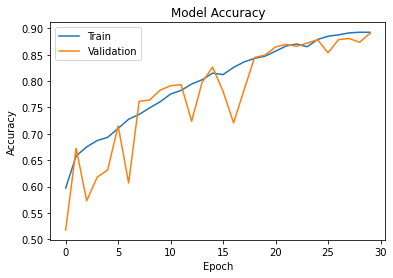

In [14]:
# Plotting training and validation accuracies with the number of epochs on the X-axis 
plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**

- Both the train and validation accuracies have kept improving slowly as epoche increasing.
- After 30 epochs, the training accuracy is about 91% and the validation accuracy is about 90%.
- We can further try to increase the model accuracy as even small errors can prove to be very costly in the field of medical research.
- We observe from the above graph that both train and validation accuracies are displaying an upward trend against the number of epochs. This shows that the model performance can improve further if we increase the model complexity or by training the model for more number of epochs. 

In [15]:
model_cnn = Sequential()

# First CNN block
model_cnn.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (picture_size, picture_size, channels)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size = (2, 2))) 

# Second CNN block
model_cnn.add(Conv2D(128, (5, 5), padding = 'same'))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Third CNN block
model_cnn.add(Conv2D(512, (5, 5), padding = 'same'))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Fourth CNN block
model_cnn.add(Conv2D(512, (5, 5), padding = 'same'))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening layer
model_cnn.add(Flatten())

# First fully connected layer
model_cnn.add(Dense(256))
model_cnn.add(Activation('relu'))

# Seconf fully connected layer
model_cnn.add(Dense(512))
model_cnn.add(Activation('relu'))

# Classifier
model_cnn.add(Dense(2, activation = 'softmax'))

# Adam optimizer with 0.0001 learning rate
opt = Adam(learning_rate = 0.0001)

# Compiling the model
model_cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Model summary
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 activation_1 (Activation)   (None, 24, 24, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                  

In [ ]:
# Fitting the model
history2 = model_cnn.fit(train_set,
                         steps_per_epoch = train_set.n//train_set.batch_size,
                         epochs = 20,
                         validation_data = validation_set
                        )

Epoch 1/20
155/155 [==============================] - 1688s 11s/step - loss: 0.6450 - accuracy: 0.6261 - val_loss: 0.6877 - val_accuracy: 0.5494
Epoch 2/20
155/155 [==============================] - 1683s 11s/step - loss: 0.4789 - accuracy: 0.7708 - val_loss: 0.2429 - val_accuracy: 0.8976
Epoch 3/20
155/155 [==============================] - 1675s 11s/step - loss: 0.1761 - accuracy: 0.9345 - val_loss: 0.1636 - val_accuracy: 0.9327
Epoch 4/20
155/155 [==============================] - 1671s 11s/step - loss: 0.1131 - accuracy: 0.9602 - val_loss: 0.1044 - val_accuracy: 0.9611
Epoch 5/20
155/155 [==============================] - 1675s 11s/step - loss: 0.0948 - accuracy: 0.9684 - val_loss: 0.0955 - val_accuracy: 0.9671
Epoch 6/20
155/155 [==============================] - 1674s 11s/step - loss: 0.0857 - accuracy: 0.9716 - val_loss: 0.0806 - val_accuracy: 0.9701
Epoch 7/20
 21/155 [===>..........................] - ETA: 22:50 - loss: 0.0666 - accuracy: 0.9795

In [ ]:
# Plotting training and validation accuracies with the number of epochs on the X-axis 
plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**

- The performance of this model is higher in comparison to the performance of previous models. We can see that we have received training and validation accuracies over 99%.
- The similar training and validation accuracies show that model is not overfitting the training data.
- The possible reason for such improvement is likely the higher number of trainable parameters. As suspected, the earlier models were not complex enough (less number of parameters) to have their weights adjust appropriately to identify the patterns in the images. Hence, we are choosing this model as the final model.

# **Vision transformers**

**Configure the hyperparameters**

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

Use data augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

Implement multilayer perceptron (MLP)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

Implement patch creation as a layer

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Display patches for a sample image

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

Implement the patch encoding layer
The PatchEncoder layer will linearly transform a patch by projecting it into a vector of size projection_dim. In addition, it adds a learnable position embedding to the projected vector.

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# **Build the ViT model**

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

Compile, train, and evaluate the mode

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history3 = run_experiment(vit_classifier)